In [93]:
## library(igraph)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggrepel)
library(ggbeeswarm)
library(patchwork)
library(writexl)
options(ggrepel.max.overlaps = Inf)

In [94]:
cgsf_all = qs::qread('_targets_nhBulkDESeq/objects/combined_gost_seurat_formatted')
cgsf_all %>% head(1)

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,⋯,recall,term_id,source,term_name,effective_domain_size,source_order,parents,evidence_codes,intersection,gene_ids
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>,<chr>,<chr>
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,⋯,0.00686948,GO:0048731,GO:BP,system development,26856,13640,"GO:0007275, GO:0048856","IDA IMP IGI ISO IBA TAS IEA,IDA,IEA,ISO,IDA IBA,ISS ISO IEA,ISO,ISO IEA,ISS,IEA,IBA,IMP,IMP,IDA IMP IGI IBA,IMP,IMP,IGI,IMP,IEA,ISS ISO IBA IEA,IEA,IMP,IDA IMP IGI,IDA IMP ISS ISO IBA IEA,IMP IGI,IMP ISO IEA,IDA IMP IBA,ISS ISO IEA","ENSMUSG00000022306,ENSMUSG00000020027,ENSMUSG00000052516,ENSMUSG00000021219,ENSMUSG00000059187,ENSMUSG00000056755,ENSMUSG00000054555,ENSMUSG00000032006,ENSMUSG00000006586,ENSMUSG00000038048,ENSMUSG00000039539,ENSMUSG00000044042,ENSMUSG00000020422,ENSMUSG00000046532,ENSMUSG00000036356,ENSMUSG00000039298,ENSMUSG00000045875,ENSMUSG00000036466,ENSMUSG00000026104,ENSMUSG00000055407,ENSMUSG00000055421,ENSMUSG00000022656,ENSMUSG00000004040,ENSMUSG00000020598,ENSMUSG00000024085,ENSMUSG00000019505,ENSMUSG00000066129,ENSMUSG00000031503","Zfpm2,Socs2,Robo2,Rgs6,Tafa1,Grm7,Adam12,Pdgfd,Runx1t1,Cntnap5c,Sgcz,Fmn1,Tns3,Ar,Csgalnact1,Cdk5rap2,Adra1a,Megf11,Stat1,Map6,Pcdh9,Nectin3,Stat3,Nrcam,Man2a1,Ubb,Kndc1,Col4a2"


In [95]:
combined_deg_seurat_all = qs::qread('_targets_nhBulkDESeq/objects/combined_deg_seurat_formatted')
combined_deg_seurat_all %>% head

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Epb41l4a,8.401514e-45,2.163039,1,1.000,1.472113e-40,ENSMUSG00000024376,86.15828
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Zfpm2,5.900025e-23,3.788815,1,1.000,1.033802e-18,ENSMUSG00000022306,68.14397
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Socs2,3.311117e-24,2.813449,1,0.923,5.801740e-20,ENSMUSG00000020027,54.12074
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Rbms1,3.987059e-29,2.029637,1,1.000,6.986125e-25,ENSMUSG00000026970,49.02743
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Robo2,2.392307e-26,1.740892,1,1.000,4.191801e-22,ENSMUSG00000052516,37.21610
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Rgs6,9.316477e-15,3.731532,1,1.000,1.632433e-10,ENSMUSG00000021219,36.52112


In [96]:
nhgc = qs::qread('_targets_nhBulkDESeq/objects/nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14') # Astrocytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none
nhgc %>% group_by(fgf1_grouping) %>% summarise(n=n())
nhgc %>% group_by(restored_grouping) %>% summarise(n=n())
# don't worry about this now, just state all markers for all clusters you want

fgf1_grouping,n
<chr>,<int>
none,2123


restored_grouping,n
<fct>,<int>
none,2123


In [97]:
tag2 = combined_deg_seurat_all %>% 
    pull(tag) %>% unique %>%
    str_split(pattern = "___") %>%
    map_chr(~if (length(.x) >= 3) paste(.x[1:2], collapse = "___") else .x[1]) %>%
    unique
        
tag2_tibble = tag2 %>% tibble(tag2=.) %>%
mutate(path_to_target = paste0('_targets_nhBulkDESeq/objects/nhgc_', tag2)) %>%
mutate(obj = purrr::map(path_to_target, ~if (file.exists(.x)) qs::qread(.x) else NA))
    
combined_tibble <- tag2_tibble %>%
  mutate(obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y) else tibble())) %>%
  pull(obj) %>%
  map_dfr(identity)

Warning message:
“There were 52 warnings in `mutate()`.
The first warning was:
ℹ In argument: `obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y)
  else tibble())`.
Caused by warning in `if (!is.na(.x)) ...`:
! the condition has length > 1 and only the first element will be used
ℹ Run `dplyr::last_dplyr_warnings()` to see the 51 remaining warnings.”


In [98]:
library(dplyr)
library(tidyr)

# Tibble for fgf1_grouping
fgf1_tibble <- combined_tibble %>% 
  filter(fgf1_grouping %in% c('neg', 'none', 'pos')) %>%
  group_by(tag2, fgf1_grouping) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping, values_from = count, names_prefix = "fgf1_", values_fill = 0) %>%
  rowwise() %>%
  mutate(total_cells = sum(c_across(-tag2), na.rm = TRUE)) %>% 
  ungroup

# Tibble for fgf1_grouping with _restored
restored_tibble <- combined_tibble %>% 
  mutate(fgf1_grouping_restored = str_replace_all(fgf1_grouping, c("neg" = "neg_restored", "pos" = "pos_restored"))) %>%
  filter(fgf1_grouping_restored %in% c('neg_restored', 'none', 'pos_restored')) %>%
  group_by(tag2, fgf1_grouping_restored) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping_restored, values_from = count, names_prefix = "restored_", values_fill = 0) %>%
  rowwise() %>%
  mutate(total_cells = sum(c_across(-tag2), na.rm = TRUE)) %>% 
  ungroup

# Tibble for fgf1_grouping with _restored
bl6_tibble <- combined_tibble %>% 
  mutate(bl6_grouping = str_replace_all(bl6_grouping, c("neg" = "neg", "pos" = "pos"))) %>%
  filter(bl6_grouping %in% c('neg', 'none', 'pos')) %>%
  group_by(tag2, bl6_grouping) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = bl6_grouping, values_from = count, names_prefix = "bl6_", values_fill = 0) %>%
  rowwise() %>%
  mutate(total_cells = sum(c_across(-tag2), na.rm = TRUE)) %>% 
  ungroup



In [163]:
frac_cutoff = 0.10
n_cells_cutoff = 150

# Create the first tibble
fgf1_tibble_new <- fgf1_tibble %>%
  pivot_longer(cols = starts_with("fgf1_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "fgf1_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___fgf1_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(frac = count/total_cells) %>%
  mutate(frac_cutoff = frac_cutoff) %>%
  mutate(n_cells_cutoff = n_cells_cutoff) %>%
  mutate(n_cells_valid = ifelse(((frac >= frac_cutoff) & (count >= n_cells_cutoff)), TRUE, FALSE)) %>%
  select(tag, count, total_cells, frac, frac_cutoff, n_cells_cutoff, n_cells_valid)

# Create the second tibble
restored_tibble_new <- restored_tibble %>%
  pivot_longer(cols = starts_with("restored_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "restored_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___restored_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(frac = count/total_cells) %>%
  mutate(frac_cutoff = frac_cutoff) %>%
  mutate(n_cells_cutoff = n_cells_cutoff) %>%
  mutate(n_cells_valid = ifelse(((frac >= frac_cutoff) & (count >= n_cells_cutoff)), TRUE, FALSE)) %>%
  select(tag, count, total_cells, frac, frac_cutoff, n_cells_cutoff, n_cells_valid)

# Create the second tibble
bl6_tibble_new <- bl6_tibble %>%
  pivot_longer(cols = starts_with("bl6_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "bl6_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___bl6_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(frac = count/total_cells) %>%
  mutate(frac_cutoff = frac_cutoff) %>%
  mutate(n_cells_cutoff = n_cells_cutoff) %>%
  mutate(n_cells_valid = ifelse(((frac >= frac_cutoff) & (count >= n_cells_cutoff)), TRUE, FALSE)) %>%
  select(tag, count, total_cells, frac, frac_cutoff, n_cells_cutoff, n_cells_valid)

# Bind the rows of the two tibbles
new_tibble <- bind_rows(fgf1_tibble_new, restored_tibble_new, bl6_tibble_new) %>%
    filter(!str_detect(tag, 'NA'))

new_tibble %>% filter(str_detect(tag, 'Agrp___Day5.obob5v5__v__Day5.obobBL6d5'))

tag,count,total_cells,frac,frac_cutoff,n_cells_cutoff,n_cells_valid
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,343,2284,0.1501751,0.1,150,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,514,2284,0.2250438,0.1,150,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none,343,2284,0.1501751,0.1,150,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,514,2284,0.2250438,0.1,150,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,688,2284,0.3012259,0.1,150,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.pos_vs_none,1406,2284,0.6155867,0.1,150,TRUE


In [164]:
new_tibble %>% filter(frac >= 0.10) %>% arrange(frac) %>% filter(!str_detect(tag, 'bl6_grouping'))

tag,count,total_cells,frac,frac_cutoff,n_cells_cutoff,n_cells_valid
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
Tbx19__Pirt___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,122,1183,0.1031276,0.1,150,FALSE
Tbx19__Pirt___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none,122,1183,0.1031276,0.1,150,FALSE
Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,528,5005,0.1054945,0.1,150,TRUE
Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,528,5005,0.1054945,0.1,150,TRUE
Sst__Unc13c___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,163,1535,0.1061889,0.1,150,TRUE
Sst__Unc13c___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,163,1535,0.1061889,0.1,150,TRUE
n1___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,627,5198,0.1206233,0.1,150,TRUE
n1___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,627,5198,0.1206233,0.1,150,TRUE
Tbx19__Pirt___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,147,1183,0.1242604,0.1,150,FALSE


In [165]:
labels_classes_tib = bind_rows(qs::qread('_targets_nhBulkDESeq/objects/exp_labelled_other') %>% 
          `[[` %>% 
          distinct(class, labels_lvl1) %>% 
          rename(labels = labels_lvl1),
          qs::qread('_targets_nhBulkDESeq/objects/exp_labelled_neuron') %>% 
          `[[` %>% 
          distinct(class, labels_lvl1) %>% 
          rename(labels = labels_lvl1),
         ) %>%
tibble %>%
rename(cluster = labels) %>%
rowwise %>%
mutate(cluster = str_replace_all(cluster, '/', '__')) %>%
ungroup

labels_classes_tib %>% head

class,cluster
<chr>,<chr>
other,Tanycytes
other,OPC
other,Astrocytes
other,Ependymal_cells
other,Oligodendrocytes
other,Microglia


In [166]:
labels_classes_tib %>% filter(str_detect(cluster, "Lmx"))

class,cluster
<chr>,<chr>
neuron,Irx5__Lmx1a


In [167]:
new_tibble %>% head

tag,count,total_cells,frac,frac_cutoff,n_cells_cutoff,n_cells_valid
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.neg_vs_none,0,2123,0.0000000,0.1,150,FALSE
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,0,2123,0.0000000,0.1,150,FALSE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,343,2284,0.1501751,0.1,150,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,514,2284,0.2250438,0.1,150,TRUE
Astrocytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.neg_vs_none,0,6867,0.0000000,0.1,150,FALSE
Astrocytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,0,6867,0.0000000,0.1,150,FALSE


In [168]:
combined_deg_seurat = combined_deg_seurat_all %>%
filter(p_val_adj < 0.05 &
       avg_log2FC > 0 &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster')

combined_deg_seurat %>% distinct(cluster, class)

cluster,class
<chr>,<chr>
Agrp,neuron
Astrocytes,other
g1,NA
g2,NA
g3,NA
Ghrh,neuron
Htr3b,neuron
Irx5__Lmx1a,neuron
Kiss1__Tac2,neuron


In [169]:
labels_classes_tib %>% filter(str_detect(cluster, 'Lmx'))

class,cluster
<chr>,<chr>
neuron,Irx5__Lmx1a


In [170]:
combined_deg_seurat = combined_deg_seurat_all %>%
filter(p_val_adj < 0.05 &
       avg_log2FC > 0 &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster') %>% 
left_join(new_tibble, by=c('tag')) %>%
relocate(class, .after='cluster')

In [171]:
combined_deg_seurat %>% pull(fgf1_comparison) %>% unique
combined_deg_seurat %>% pull(bl6_comparison) %>% unique
combined_deg_seurat %>% pull(grouping) %>% unique
combined_deg_seurat %>% pull(cells_a) %>% unique
combined_deg_seurat %>% pull(cells_b) %>% unique

[1] "obob14v14" "obob5v5"

[1] "obobBL6d14" "obobBL6d5"

[1] "bl6_grouping"      "fgf1_grouping"     "restored_grouping"

[1] "neg"          "pos"          "neg_restored" "pos_restored"

[1] "none"

In [172]:
cluster_order = combined_deg_seurat %>%
filter(fgf1_day == 'Day5'  &
       grouping == 'fgf1_grouping') %>%
group_by(cluster) %>%
summarise(n=n()) %>% 
arrange(desc(n)) %>%
pull(cluster)

In [173]:
options(repr.plot.width=7, repr.plot.height=2)
markers = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')

# Set dimensions
options(repr.plot.width=7, repr.plot.height=2)

# Load necessary library
make_marker_bars = function(markers){
    # Grouping and counting
    markers_summary <- markers %>%
      group_by(cluster, cells_a, n_cells_valid) %>%
      summarise(n = if_else(all(n_cells_valid), n(), NA), .groups = "drop") %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

    # Calculate upper limit for y-axis, considering some space for the labels
    upper_limit <- max(markers_summary$n) * 1.25  # You can adjust the multiplier to get a suitable space for the labels

    # Plotting
    ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
      geom_bar(stat = "identity", position = position_dodge()) +
      geom_text(aes(label=n), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = TRUE) +
      xlab("Cluster") +
      theme_classic() +
      theme(axis.title.y = element_blank(), 
            axis.title.x = element_blank(), 
            plot.title = element_blank(), 
            axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
            legend.text = element_text(size = 6),
            legend.title = element_text(size = 7)) +
      scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
      ylim(0, upper_limit)  # Setting the limits for y-axis
}


In [174]:
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')

In [175]:
make_marker_bars = function(markers, cluster_categories, y_upper_limit=150){
    # Grouping and counting
    markers_summary <- markers %>%
          mutate(cluster = factor(cluster)) %>%  # Make sure that 'cluster' is a factor
          group_by(cluster, cells_a) %>%
          summarise(n = if_else(all(n_cells_valid), n(), 0L), .groups = "drop") %>%
          ungroup %>%
          filter(cluster %in% cluster_categories) %>%
          mutate(cluster = droplevels(cluster))  %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

        # Create a factor with all possible levels
        all_clusters <- factor(markers_summary$cluster, levels = c(cluster_categories, unique(markers_summary$cluster)))

        # Joining with expanded frame to ensure all combinations
        markers_summary <- tidyr::expand_grid(cluster = cluster_categories, cells_a = unique(markers_summary$cells_a)) %>%
          left_join(markers_summary, by = c("cluster", "cells_a")) %>%
          replace_na(list(n = 0)) %>%
          mutate(n_label = case_when(n == 0 ~ '',
                               TRUE ~ paste0(n)))
    
        markers_summary %>% arrange(desc(n)) %>% head(1000) %>% print

        # Plotting
        ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
          geom_bar(stat = "identity", position = position_dodge()) +
          geom_text(aes(label=n_label), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = FALSE) +
#           geom_text_repel(data = subset(markers_summary, n > 0), aes(label = n), 
#                           size = 2.5, force = 0, segment.size = 0.2, nudge_y = 0.5) +
          scale_x_discrete(drop = FALSE, limits = cluster_categories) +  # Ensures that all levels are shown on x-axis
          xlab("Cluster") +
          theme_classic() +
          theme(axis.title.y = element_blank(), 
                axis.title.x = element_blank(), 
#                 plot.title = element_blank(), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
                legend.text = element_text(size = 6),
                legend.title = element_text(size = 7)) +
#           scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
    scale_fill_manual(values = c("neg" = "#d73027", "pos" = "#4575b4", "neg_restored" = "#a50026", "pos_restored" = "#313695")) +
          ylim(0, y_upper_limit)  # Setting the limits for y-axis
}


In [176]:
cluster_categories = labels_classes_tib %>% filter(class == 'other') %>% pull(cluster)
cluster_categories

[1] "Tanycytes"         "OPC"               "Astrocytes"       
[4] "Ependymal_cells"   "Oligodendrocytes"  "Microglia"        
[7] "Endothelial_cells"

# A tibble: 14 × 4
   cluster           cells_a     n n_label
   <chr>             <chr>   <int> <chr>  
 1 OPC               pos      1482 "1482" 
 2 Astrocytes        pos      1065 "1065" 
 3 OPC               neg       996 "996"  
 4 Tanycytes         pos        80 "80"   
 5 Astrocytes        neg         8 "8"    
 6 Oligodendrocytes  pos         2 "2"    
 7 Tanycytes         neg         0 ""     
 8 Ependymal_cells   neg         0 ""     
 9 Ependymal_cells   pos         0 ""     
10 Oligodendrocytes  neg         0 ""     
11 Microglia         neg         0 ""     
12 Microglia         pos         0 ""     
13 Endothelial_cells neg         0 ""     
14 Endothelial_cells pos         0 ""     


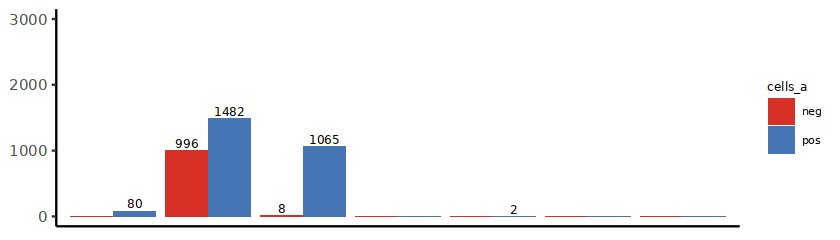

In [177]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d5_other = make_marker_bars(markers_d5_other, cluster_categories, 3000) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other

# A tibble: 14 × 4
   cluster           cells_a          n n_label
   <chr>             <chr>        <int> <chr>  
 1 Astrocytes        neg_restored     4 "4"    
 2 Tanycytes         neg_restored     0 ""     
 3 Tanycytes         pos_restored     0 ""     
 4 OPC               neg_restored     0 ""     
 5 OPC               pos_restored     0 ""     
 6 Astrocytes        pos_restored     0 ""     
 7 Ependymal_cells   neg_restored     0 ""     
 8 Ependymal_cells   pos_restored     0 ""     
 9 Oligodendrocytes  neg_restored     0 ""     
10 Oligodendrocytes  pos_restored     0 ""     
11 Microglia         neg_restored     0 ""     
12 Microglia         pos_restored     0 ""     
13 Endothelial_cells neg_restored     0 ""     
14 Endothelial_cells pos_restored     0 ""     


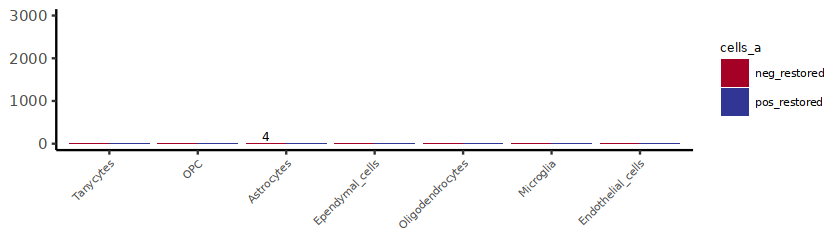

In [178]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')  %>%
bind_rows(tibble(cluster = .$cluster, cells_a = 'pos_restored'))
ggp_d5_other_restored = make_marker_bars(markers_d5_other, cluster_categories, 3000)
ggp_d5_other_restored

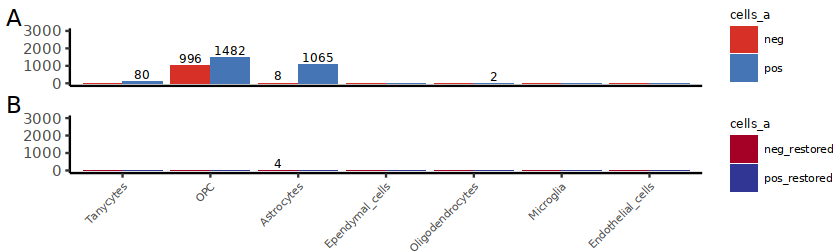

In [179]:
options(repr.plot.width=7, repr.plot.height=2.1)
layout <- '
A
B
'
ggp_all_other = wrap_plots(A = ggp_d5_other,
               B = ggp_d5_other_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2)) 

ggp_all_other = ggp_all_other + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_other %>% ggsave('_targets_nhBulkDESeq/deg_count_plot_other_AB_nhBulkDESeq.pdf', plot = ., width = 7, height=4)
ggp_all_other

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <chr>, n <int>, n_label <chr>


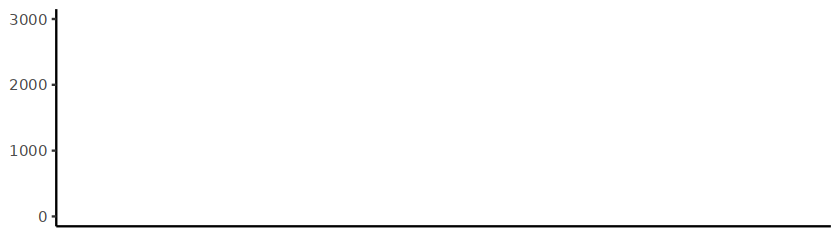

In [180]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other') %>%
bind_rows(tibble(cluster = .$cluster, cells_a = 'neg'))
ggp_d14_other = make_marker_bars(markers_d14_other, cluster_categories, 3000)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_other

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <chr>, n <int>, n_label <chr>


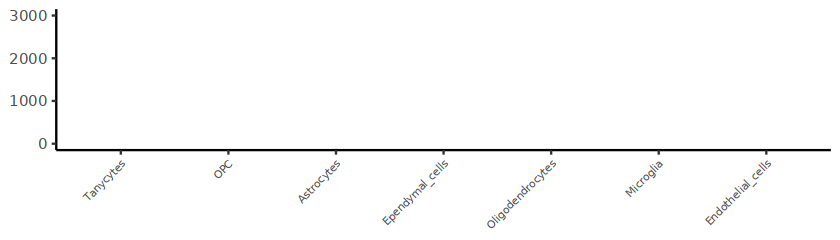

In [181]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')

ggp_d14_other_restored = make_marker_bars(markers_d14_other, cluster_categories, 3000)
ggp_d14_other_restored

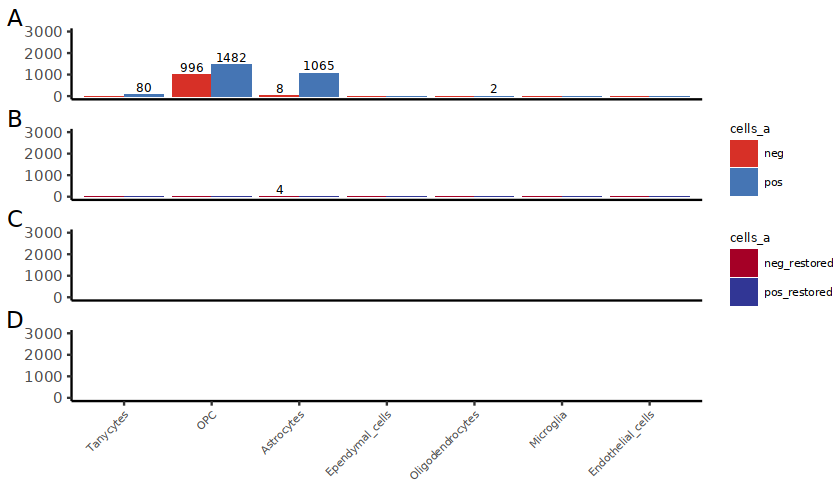

In [182]:
options(repr.plot.width=7, repr.plot.height=4)
layout <- '
A
B
C
D
'

ggp_d5_other_restored = ggp_d5_other_restored   +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())

ggp_all_other = wrap_plots(A = ggp_d5_other,
               B = ggp_d5_other_restored,
               C = ggp_d14_other,
               D = ggp_d14_other_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2)) 

ggp_all_other = ggp_all_other + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_other %>% ggsave('_targets_nhBulkDESeq/deg_count_plot_other_nhBulkDESeq.pdf', plot = ., width = 7, height=4)
ggp_all_other

In [183]:
cluster_categories = labels_classes_tib %>% filter(class == 'neuron') %>% pull(cluster)
cluster_categories

[1] "Sst__Pthlh"          "Nfix__Nfib"          "Met__Prlh"          
 [4] "Agrp"                "Sim1"                "Fez1"               
 [7] "Pou6f2__Prkcq__Whrn" "Dlk1"                "Slc17a6__Trhr"      
[10] "Esr1"                "Tmem215__Dach2"      "Sst__Nts"           
[13] "Sst__Unc13c"         "Irx5__Lmx1a"         "Htr3b"              
[16] "Hdc"                 "Lepr89"              "Nfib_1"             
[19] "Ppp1r17__Tafa4"      "Lepr67"              "Arx__Nr5a2"         
[22] "Kiss1__Tac2"         "Met__Pappa2"         "Trh__Lef1"          
[25] "Gpr50__Tac2"         "Tmem215__Greb1"      "Ghrh"               
[28] "Trh__Cxcl12"         "Lepr15"              "Pomc__Ttr"          
[31] "Tbx19__Pirt"         "Pomc__Glipr1"        "Pomc__Anxa2"        
[34] "Npsr1__Epha3"        "Nfix__Nfib__Lhx6"    "Reln__Lef1"         
[37] "unassigned(2)"       "Th__Nfib"            "Ppp1r17"            
[40] "Th__Slc6a3"          "Nfib_3"              "Ppp1r17__Ltbp1"     
[43] "Lpar1_oligo"         "Nfib_2"              "Nfix__Nfib__Hgf"

In [184]:
cluster_categories = cluster_categories %>% str_replace('/', '__')

# A tibble: 90 × 4
   cluster     cells_a     n n_label
   <chr>       <chr>   <int> <chr>  
 1 Agrp        pos       335 "335"  
 2 Htr3b       neg       230 "230"  
 3 Trh__Lef1   pos       116 "116"  
 4 Trh__Lef1   neg        48 "48"   
 5 Sst__Unc13c pos        43 "43"   
 6 Htr3b       pos        27 "27"   
 7 Agrp        neg         8 "8"    
 8 Ghrh        neg         5 "5"    
 9 Sst__Pthlh  neg         0 ""     
10 Sst__Pthlh  pos         0 ""     
# ℹ 80 more rows


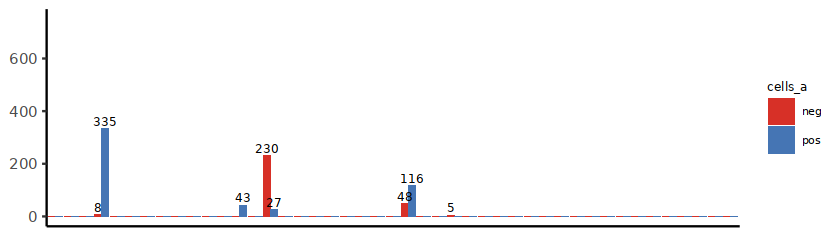

In [185]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron = make_marker_bars(markers_d5_neuron, cluster_categories, 750) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron

# A tibble: 90 × 4
   cluster     cells_a          n n_label
   <chr>       <chr>        <int> <chr>  
 1 Agrp        pos_restored   362 "362"  
 2 Htr3b       pos_restored    57 "57"   
 3 Sst__Unc13c pos_restored    43 "43"   
 4 Agrp        neg_restored     8 "8"    
 5 Ghrh        neg_restored     5 "5"    
 6 Sst__Pthlh  neg_restored     0 ""     
 7 Sst__Pthlh  pos_restored     0 ""     
 8 Nfix__Nfib  neg_restored     0 ""     
 9 Nfix__Nfib  pos_restored     0 ""     
10 Met__Prlh   neg_restored     0 ""     
# ℹ 80 more rows


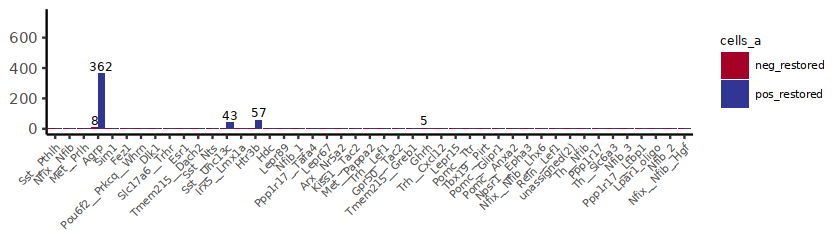

In [186]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron_restored = make_marker_bars(markers_d5_neuron, cluster_categories, 750) 
ggp_d5_neuron_restored

# A tibble: 90 × 4
   cluster     cells_a          n n_label
   <chr>       <chr>        <int> <chr>  
 1 Agrp        pos_restored   362 "362"  
 2 Htr3b       pos_restored    57 "57"   
 3 Sst__Unc13c pos_restored    43 "43"   
 4 Agrp        neg_restored     8 "8"    
 5 Ghrh        neg_restored     5 "5"    
 6 Sst__Pthlh  neg_restored     0 ""     
 7 Sst__Pthlh  pos_restored     0 ""     
 8 Nfix__Nfib  neg_restored     0 ""     
 9 Nfix__Nfib  pos_restored     0 ""     
10 Met__Prlh   neg_restored     0 ""     
# ℹ 80 more rows


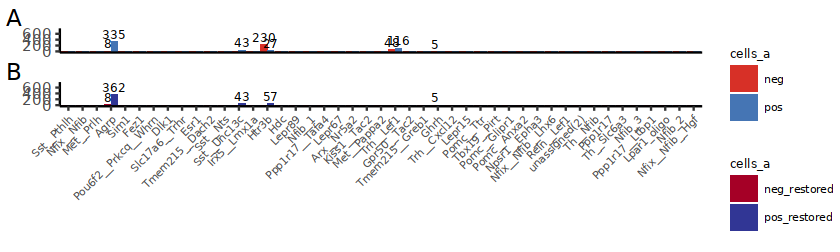

In [187]:
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron_restored = make_marker_bars(markers_d5_neuron, cluster_categories, 750)
ggp_all_neuron = wrap_plots(A = ggp_d5_neuron,
               B = ggp_d5_neuron_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))  


options(repr.plot.width=7, repr.plot.height=2.1)
layout <- '
A
B
'

# + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron = ggp_all_neuron + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron %>% ggsave('_targets_nhBulkDESeq/deg_count_plot_neuron_AB_nhBulkDESeq.pdf', plot = ., width = 7, height=4)
ggp_all_neuron

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <chr>, n <int>, n_label <chr>


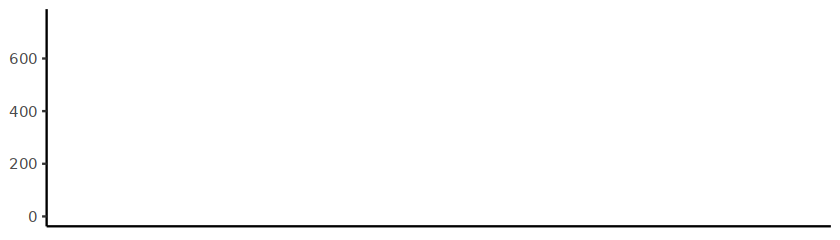

In [188]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d14_neuron = make_marker_bars(markers_d14_neuron, cluster_categories, 750)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_neuron

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <fct>, n <int>, n_label <chr>


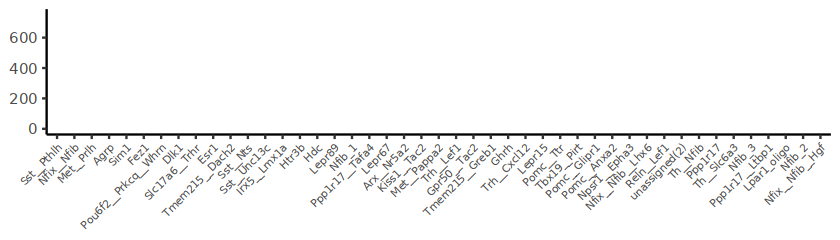

In [189]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    mutate(cells_a = factor(cells_a, levels=c('neg_restored', 'pos_restored'))) %>%
    filter(class == 'neuron')
ggp_d14_neuron_restored = make_marker_bars(markers_d14_neuron, cluster_categories, 750)
ggp_d14_neuron_restored

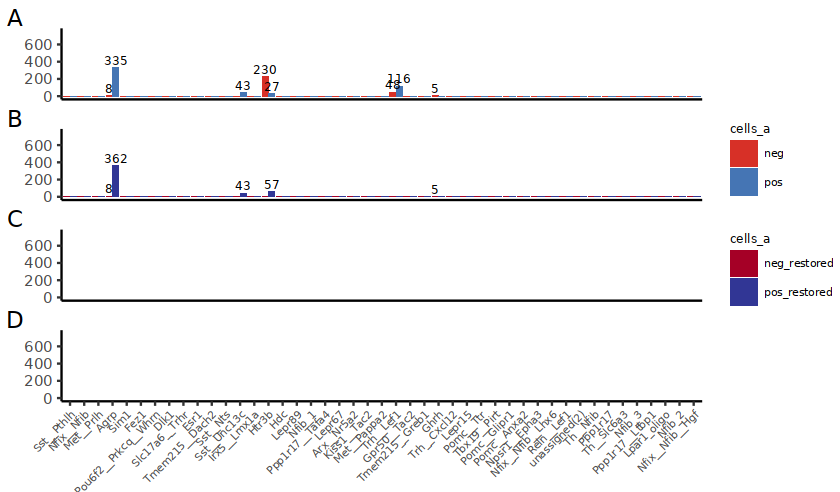

In [190]:
options(repr.plot.width=7, repr.plot.height=4.1)
layout <- '
A
B
C
D
'

ggp_d5_neuron_restored = ggp_d5_neuron_restored  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())

ggp_all_neuron = wrap_plots(A = ggp_d5_neuron,
               B = ggp_d5_neuron_restored,
               C = ggp_d14_neuron,
               D = ggp_d14_neuron_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))  

# + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron = ggp_all_neuron + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron %>% ggsave('_targets_nhBulkDESeq/deg_count_plot_neuron_nhBulkDESeq.pdf', plot = ., width = 7, height=4)
ggp_all_neuron

In [191]:
combined_deg_seurat %>% 
filter(cluster == 'Irx5__Lmx1a')

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,⋯,pct.2,p_val_adj,ensmusg,gsea_sort_score,count,total_cells,frac,frac_cutoff,n_cells_cutoff,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,6.920300e-06,ENSMUSG00000022112,18.552625,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,2.445483e-10,ENSMUSG00000032036,18.267434,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,2.730932e-04,ENSMUSG00000093497,13.938534,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,1.828769e-04,ENSMUSG00000025324,7.962547,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,2.178404e-04,ENSMUSG00000060429,6.237538,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,6.005335e-06,ENSMUSG00000030970,5.643641,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,2.287999e-03,ENSMUSG00000052560,5.164488,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,2.026728e-03,ENSMUSG00000003418,4.356982,70,2686,0.02606106,0.1,150,FALSE
Irx5__Lmx1a___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Irx5__Lmx1a,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,⋯,1,2.482384e-07,ENSMUSG00000037926,4.021370,70,2686,0.02606106,0.1,150,FALSE


In [192]:
combined_deg_seurat %>%
distinct(cluster, class) %>%
filter(is.na(class))

cluster,class
<chr>,<chr>
g1,NA
g2,NA
g3,NA
n0,NA
n1,NA
n2,NA
n3,NA
n5,NA
neuron,NA


In [193]:
combined_deg_seurat %>% write_xlsx('_targets_nhBulkDESeq/combined_deg_seurat_d5_d14_nhBulkDESeq.xlsx')